In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

 # Black-Scholes-Merton Model


### 1.Sigma Calculation

In [2]:
nifty_1Y = pd.read_csv("/Users/aayushmishra/Downloads/NIFTY 50-28-04-2023-to-28-04-2024.csv")

In [3]:
nifty_1Y.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,28-APR-2023,17950.4,18089.15,17885.30,18065.00,290263674.0,27026.12
1,02-MAY-2023,18124.8,18180.25,18101.75,18147.65,265216308.0,23615.47
2,03-MAY-2023,18113.8,18116.35,18042.40,18089.85,226171254.0,19079.79
3,04-MAY-2023,18081.0,18267.45,18066.70,18255.80,226643581.0,21889.48
4,05-MAY-2023,18117.3,18216.95,18055.45,18069.00,239702311.0,26152.88


In [4]:
nifty_1Y.describe()

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
count,248.000000,248.000000,248.000000,248.000000,2.470000e+02,247.000000
mean,20307.937903,20380.704234,20217.409476,20303.473992,2.835809e+08,26357.956194
std,1383.757418,1398.608329,1367.087408,1382.821810,8.825211e+07,8511.995461
min,17950.400000,18089.150000,17885.300000,18065.000000,3.576381e+07,1918.770000
25%,19375.375000,19432.100000,19299.112500,19362.912500,2.263992e+08,21262.940000
50%,19772.850000,19827.350000,19695.925000,19750.150000,2.653240e+08,24521.240000
75%,21730.225000,21806.600000,21602.612500,21727.125000,3.291455e+08,29898.000000
max,22765.100000,22775.700000,22673.700000,22753.800000,6.964958e+08,70755.080000


In [5]:
nifty_1Y.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

In [6]:
nifty_1Y['Returns'] = (nifty_1Y['Close '].pct_change())
nifty_1Y['Log Returns'] = np.log(1 + nifty_1Y['Returns'])
nifty_1Y.dropna(inplace=True)

In [7]:
nifty_1Y[['Returns','Log Returns']]

,Returns,Log Returns
1,0.004575,0.004565
2,-0.003185,-0.003190
3,0.009174,0.009132
4,-0.010232,-0.010285
5,0.010814,0.010756
...,...,...
243,0.008552,0.008516
244,0.001415,0.001414
245,0.001538,0.001537
246,0.007497,0.007469


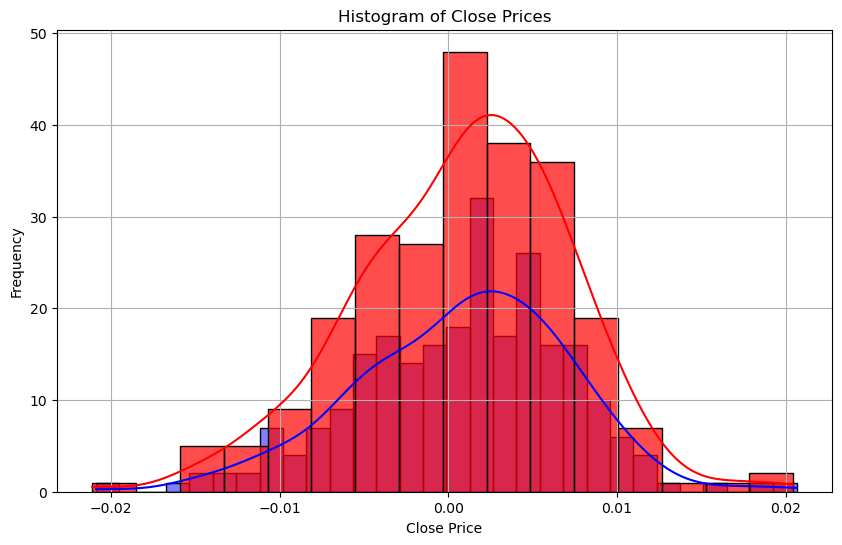

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(nifty_1Y['Returns'], kde=True, color='blue', bins=30)
sns.histplot(nifty_1Y['Log Returns'], label='Log Returns', kde =True,color='red', alpha=0.7)
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

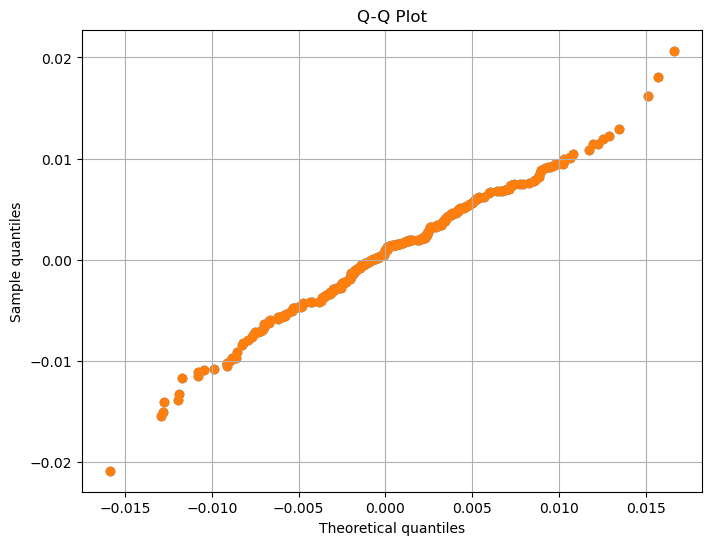

In [9]:
import scipy.stats as stats

# Assuming 'data' is your DataFrame with 'Returns' column
# Calculate the mean and standard deviation of your data
mean = nifty_1Y['Returns'].mean()
std_dev = nifty_1Y['Returns'].std()

# Generate a normal distribution with the same mean and standard deviation as your data
normal_distribution = np.random.normal(mean, std_dev, len(nifty_1Y))

# Sort your data and the normal distribution
sorted_data = np.sort(nifty_1Y['Returns'])
sorted_normal = np.sort(normal_distribution)

# Create a Q-Q plot
plt.figure(figsize=(8, 6))
plt.scatter(sorted_normal, sorted_data)
plt.scatter(sorted_normal, sorted_data)
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.title('Q-Q Plot')
plt.grid(True)
plt.show()

In [10]:
from scipy.stats import kstest

# Perform Kolmogorov-Smirnov test
statistic, p_value = kstest(nifty_1Y['Log Returns'], 'norm')

# Print the test statistic and p-value
print("Kolmogorov-Smirnov Test:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

Kolmogorov-Smirnov Test:
Test Statistic: 0.4918392226907218
P-value: 1.997036237990261e-55
The data does not look Gaussian (reject H0)


In [11]:
from scipy.stats import shapiro

# Assuming 'data' is your DataFrame with 'Log Returns' column
# Perform Shapiro-Wilk test
statistic, p_value = shapiro(nifty_1Y['Log Returns'])

# Print the test statistic and p-value
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

Shapiro-Wilk Test:
Test Statistic: 0.9894863367080688
P-value: 0.0711241289973259
The data looks Gaussian (fail to reject H0)


In [12]:
hist_volatilityR=nifty_1Y["Returns"].std()*np.sqrt(252)
hist_volatilityLR=nifty_1Y["Log Returns"].std()*np.sqrt(252)
print(hist_volatilityR,hist_volatilityLR)
sigma = hist_volatilityLR

0.09981165728631716 0.09981821900638273


### 2.Risk Free Rate Calculation(rf)

In [13]:
#91-Day Treasury Bill (Primary) Yield(April24)=6.88%
rf=0.0688

### 3. Value Calculation based on BSM


In [44]:
def Val(current,strike,rf,sigma,T):
    d1=np.log(current/strike)+ (rf+ (sigma**2)/2)*T
    d2=d1 - sigma*np.sqrt(T)
    c=current*norm.cdf(d1) - strike*np.exp(-rf*T)*norm.cdf(d2)
    return c
    

In [52]:
OptionsData = pd.read_csv("/Users/aayushmishra/Downloads/OPTIDX_NIFTY_CE_30-Jan-2024_TO_30-Apr-2024.csv")

In [53]:
OptionsData

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value
0,NIFTY,30-Jan-2024,25-Apr-2024,CE,19600.0,-,-,-,2149.70,-,2249.55,-,-,-,-,-,21522.10
1,NIFTY,30-Jan-2024,25-Apr-2024,CE,19650.0,-,-,-,2104.85,-,2202.35,-,-,-,-,-,21522.10
2,NIFTY,30-Jan-2024,25-Apr-2024,CE,19700.0,-,-,-,2060.25,-,2155.35,-,-,-,-,-,21522.10
3,NIFTY,30-Jan-2024,25-Apr-2024,CE,19750.0,-,-,-,2016.00,-,2108.55,-,-,-,-,-,21522.10
4,NIFTY,30-Jan-2024,25-Apr-2024,CE,19800.0,-,-,-,1972.00,-,2061.95,-,-,-,-,-,21522.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5343,NIFTY,25-Apr-2024,25-Apr-2024,CE,24300.0,0.25,0.25,0.05,0.05,0.05,22570.35,11893.00,144500.83,0.88,192450.00,-82750.00,22570.35
5344,NIFTY,25-Apr-2024,25-Apr-2024,CE,24350.0,0.25,0.25,0.05,0.10,0.05,22570.35,10939.00,133182.95,0.62,128600.00,-23750.00,22570.35
5345,NIFTY,25-Apr-2024,25-Apr-2024,CE,24400.0,0.20,0.25,0.05,0.05,0.05,22570.35,14804.00,180609.76,0.96,521100.00,-21200.00,22570.35
5346,NIFTY,25-Apr-2024,25-Apr-2024,CE,24450.0,0.20,0.25,0.05,0.05,0.05,22570.35,6253.00,76443.28,0.36,86450.00,-2950.00,22570.35


In [54]:
OptionsData.columns

Index(['Symbol  ', 'Date  ', 'Expiry  ', 'Option type  ', 'Strike Price  ',
       'Open  ', 'High  ', 'Low  ', 'Close  ', 'LTP  ', 'Settle Price  ',
       'No. of contracts  ', 'Turnover * in  ₹ Lakhs',
       'Premium Turnover ** in   ₹ Lakhs', 'Open Int  ', 'Change in OI  ',
       'Underlying Value  '],
      dtype='object')

In [55]:
OptionsData['Date  '] = pd.to_datetime(OptionsData[ 'Date  '])
OptionsData['Expiry  '] = pd.to_datetime(OptionsData['Expiry  '])

# Calculate the difference in days between 'Date2' and 'Date1'
OptionsData['Days Difference'] = (OptionsData['Expiry  '] - OptionsData['Date  ']).dt.days
OptionsData["T"]=(OptionsData['Days Difference']/252)

In [56]:
OptionsData.head()

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value,Days Difference,T
0,NIFTY,2024-01-30,2024-04-25,CE,19600.0,-,-,-,2149.70,-,2249.55,-,-,-,-,-,21522.10,86,0.34127
1,NIFTY,2024-01-30,2024-04-25,CE,19650.0,-,-,-,2104.85,-,2202.35,-,-,-,-,-,21522.10,86,0.34127
2,NIFTY,2024-01-30,2024-04-25,CE,19700.0,-,-,-,2060.25,-,2155.35,-,-,-,-,-,21522.10,86,0.34127
3,NIFTY,2024-01-30,2024-04-25,CE,19750.0,-,-,-,2016.00,-,2108.55,-,-,-,-,-,21522.10,86,0.34127
4,NIFTY,2024-01-30,2024-04-25,CE,19800.0,-,-,-,1972.00,-,2061.95,-,-,-,-,-,21522.10,86,0.34127


In [57]:
columns_to_keep = ['Symbol  ', 'Date  ', 'Expiry  ', 'Option type  ', 'Strike Price  ',
    'Close  ','Underlying Value  ', 'Days Difference', 'T']

In [65]:
OptionsTest = OptionsData[columns_to_keep]

In [59]:
OptionsTest.head()

,Symbol,Date,Expiry,Option type,Strike Price,Close,Underlying Value,Days Difference,T
0,NIFTY,2024-01-30,2024-04-25,CE,19600.0,2149.70,21522.10,86,0.34127
1,NIFTY,2024-01-30,2024-04-25,CE,19650.0,2104.85,21522.10,86,0.34127
2,NIFTY,2024-01-30,2024-04-25,CE,19700.0,2060.25,21522.10,86,0.34127
3,NIFTY,2024-01-30,2024-04-25,CE,19750.0,2016.00,21522.10,86,0.34127
4,NIFTY,2024-01-30,2024-04-25,CE,19800.0,1972.00,21522.10,86,0.34127


In [62]:
OptionsTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5348 entries, 0 to 5347
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Symbol              5348 non-null   object        
 1   Date                5348 non-null   datetime64[ns]
 2   Expiry              5348 non-null   datetime64[ns]
 3   Option type         5348 non-null   object        
 4   Strike Price        5348 non-null   float64       
 5   Close               5348 non-null   float64       
 6   Underlying Value    5348 non-null   object        
 7   Days Difference     5348 non-null   int64         
 8   T                   5348 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 376.2+ KB


In [75]:
OptionsTest=OptionsTest[OptionsTest['Underlying Value  ']!="-"]
OptionsTest['Underlying Value  '] = pd.to_numeric(OptionsTest['Underlying Value  '], errors='coerce')

In [80]:
for index, row in OptionsTest.iterrows():
    current = row['Underlying Value  ']
    strike = row['Strike Price  ']
    T = row['T']
    OptionsTest.loc[index, 'c'] = Val(current, strike, 0.0688, 0.0998, T)

In [81]:
OptionsTest.head(20)

,Symbol,Date,Expiry,Option type,Strike Price,Close,Underlying Value,Days Difference,T,c
0,NIFTY,2024-01-30,2024-04-25,CE,19600.0,2149.70,21522.1,86,0.34127,1744.240664
1,NIFTY,2024-01-30,2024-04-25,CE,19650.0,2104.85,21522.1,86,0.34127,1716.394095
2,NIFTY,2024-01-30,2024-04-25,CE,19700.0,2060.25,21522.1,86,0.34127,1688.648688
3,NIFTY,2024-01-30,2024-04-25,CE,19750.0,2016.00,21522.1,86,0.34127,1661.004099
4,NIFTY,2024-01-30,2024-04-25,CE,19800.0,1972.00,21522.1,86,0.34127,1633.459985
5,NIFTY,2024-01-30,2024-04-25,CE,19850.0,1928.35,21522.1,86,0.34127,1606.016002
6,NIFTY,2024-01-30,2024-04-25,CE,19900.0,1885.00,21522.1,86,0.34127,1578.671810
7,NIFTY,2024-01-30,2024-04-25,CE,19950.0,1842.00,21522.1,86,0.34127,1551.427067
8,NIFTY,2024-01-30,2024-04-25,CE,20000.0,1799.35,21522.1,86,0.34127,1524.281434
9,NIFTY,2024-01-30,2024-04-25,CE,20050.0,1757.10,21522.1,86,0.34127,1497.234571


,Symbol,Date,Expiry,Option type,Strike Price,Close,Underlying Value,Days Difference,T,c
5249,NIFTY,2024-04-25,2024-04-25,CE,19600.0,2985.65,22570.35,0,0.0,1651.833922
5250,NIFTY,2024-04-25,2024-04-25,CE,19650.0,2895.75,22570.35,0,0.0,1621.089142
5251,NIFTY,2024-04-25,2024-04-25,CE,19700.0,2889.10,22570.35,0,0.0,1590.451340
5252,NIFTY,2024-04-25,2024-04-25,CE,19750.0,2847.00,22570.35,0,0.0,1559.920174
5253,NIFTY,2024-04-25,2024-04-25,CE,19800.0,2790.35,22570.35,0,0.0,1529.495305
...,...,...,...,...,...,...,...,...,...,...
5343,NIFTY,2024-04-25,2024-04-25,CE,24300.0,0.05,22570.35,0,0.0,-813.919925
5344,NIFTY,2024-04-25,2024-04-25,CE,24350.0,0.10,22570.35,0,0.0,-835.993108
5345,NIFTY,2024-04-25,2024-04-25,CE,24400.0,0.05,22570.35,0,0.0,-857.987820
5346,NIFTY,2024-04-25,2024-04-25,CE,24450.0,0.05,22570.35,0,0.0,-879.904323


In [90]:
Val(22604.85,22700,0.0688, 0.0998,0.11111111)

337.9133276026605